In [152]:
import pandas as pd
import numpy as np

#Read in Data From StatHead
nfldata=pd.read_csv('/Users/jake/Downloads/sb.csv')
nfldata.head(10)

,Season,Win_Pct_Dif,Point_Dif_Dif,D_Yds_Play_Dif,O_Yds_Play_Dif,TD_Pct_Dif,Int_Pct_Dif,Sack_Pct_Dif,Winner
0,2022,0.000,6,-0.32,-0.55,-1.6,-0.1,3.75,0
1,2021,0.118,4,-0.31,0.11,0.3,0.5,-4.16,0
2,2020,0.187,-26,0.49,0.25,-0.4,-0.8,0.27,1
3,2019,0.063,26,-0.70,-0.20,0.7,1.8,2.84,1
4,2018,0.125,32,0.25,0.49,0.5,0.2,1.96,1
5,2017,0.000,0,0.71,0.44,-1.2,-0.2,-0.37,1
6,2016,0.187,57,-0.38,-0.84,-1.3,-0.9,-2.27,0
7,2015,0.188,133,0.49,0.15,3.9,-1.8,0.13,1
8,2014,0.000,-15,-0.70,0.44,-1.2,0.0,4.38,1
9,2013,0.000,21,0.88,0.76,1.7,-0.6,-6.60,1


In [153]:
Final_Test=nfldata.loc[nfldata['Season']==2022]
Train=nfldata.loc[nfldata['Season']<2022]
Train.describe()
Final_Test=Final_Test[['Win_Pct_Dif','Point_Dif_Dif','D_Yds_Play_Dif','O_Yds_Play_Dif','TD_Pct_Dif','Int_Pct_Dif','Sack_Pct_Dif']]

In [154]:
#check for na 
Train.isnull().sum()

Season            0
Win_Pct_Dif       0
Point_Dif_Dif     0
D_Yds_Play_Dif    0
O_Yds_Play_Dif    0
TD_Pct_Dif        0
Int_Pct_Dif       0
Sack_Pct_Dif      0
Winner            0
dtype: int64

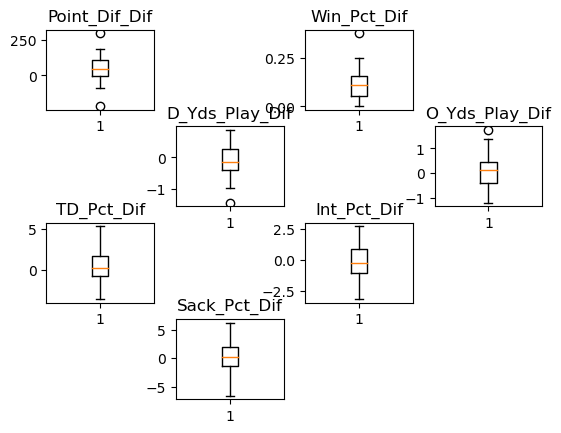

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.show()
  
# Checking all features for outliers via Boxplot
plot1 = plt.subplot2grid((4, 4), (0, 0))
plot2 = plt.subplot2grid((4, 4), (0, 2))
plot3 = plt.subplot2grid((4, 4), (1, 1))
plot4 = plt.subplot2grid((4, 4), (1, 3))
plot5 = plt.subplot2grid((4, 4), (2, 0))
plot6 = plt.subplot2grid((4, 4), (2, 2))
plot7 = plt.subplot2grid((4, 4), (3, 1))
  

plot1.boxplot(x=Train['Point_Dif_Dif'])
plot1.set_title('Point_Dif_Dif')

plot2.boxplot(x=Train['Win_Pct_Dif'])
plot2.set_title('Win_Pct_Dif')
  
plot3.boxplot(x=Train['D_Yds_Play_Dif'])
plot3.set_title('D_Yds_Play_Dif')

plot4.boxplot(x=Train['O_Yds_Play_Dif'])
plot4.set_title('O_Yds_Play_Dif')

plot5.boxplot(x=Train['TD_Pct_Dif'])
plot5.set_title('TD_Pct_Dif')

plot6.boxplot(x=Train['Int_Pct_Dif'])
plot6.set_title('Int_Pct_Dif')

plot7.boxplot(x=Train['Sack_Pct_Dif'])
plot7.set_title('Sack_Pct_Dif')

plt.show()

In [156]:
#No significant outliers
#Now we scale our features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Train=Train[['Win_Pct_Dif','Point_Dif_Dif','D_Yds_Play_Dif','O_Yds_Play_Dif','TD_Pct_Dif','Int_Pct_Dif','Sack_Pct_Dif','Winner']]
scaled_nfl=pd.DataFrame(scaler.fit_transform(Train))
colnames=['Win_Pct_Dif','Point_Dif_Dif','D_Yds_Play_Dif','O_Yds_Play_Dif','TD_Pct_Dif','Int_Pct_Dif','Sack_Pct_Dif','Winner']
scaled_nfl.columns=colnames

In [157]:
#Split Training data
from sklearn.model_selection import train_test_split
features = scaled_nfl[['Win_Pct_Dif','Point_Dif_Dif','D_Yds_Play_Dif','O_Yds_Play_Dif','TD_Pct_Dif','Int_Pct_Dif','Sack_Pct_Dif']]
outcome= Train[['Winner']]
ftrain,ftest,outtrain,outtest=train_test_split(features,outcome,test_size=0.4,random_state=10)
features.describe()

,Win_Pct_Dif,Point_Dif_Dif,D_Yds_Play_Dif,O_Yds_Play_Dif,TD_Pct_Dif,Int_Pct_Dif,Sack_Pct_Dif
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.278048,0.515226,0.582358,0.430375,0.458807,0.509080,0.529526
std,0.218809,0.159552,0.212651,0.209095,0.204426,0.239892,0.214632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.148000,0.414538,0.447198,0.276936,0.315341,0.355932,0.400738
50%,0.292000,0.509823,0.562500,0.444444,0.420455,0.500000,0.522533
75%,0.410667,0.630648,0.734914,0.555556,0.590909,0.682203,0.670357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
#Fit model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model = GaussianNB()
model.fit(ftrain,outtrain)
scores = cross_val_score(model, ftrain, outtrain, cv=10, scoring="accuracy")
print(scores.mean())

0.6333333333333332


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [159]:
model.predict(ftest)


array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0])

In [160]:
model.predict(Final_Test)

array([1])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

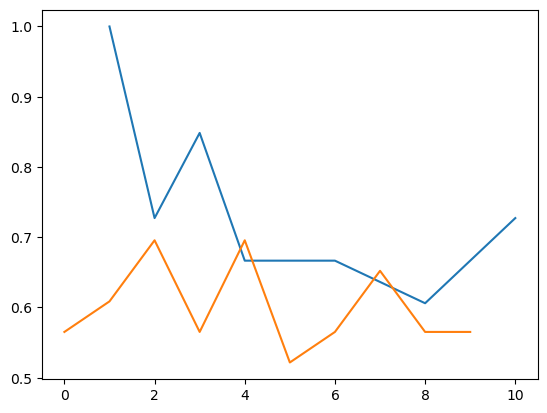

In [161]:
#Compare to another Model 
from sklearn.neighbors import KNeighborsClassifier
trainac=[]
testac=[]

k=range(1,11)
for nn in k:
    Knn=KNeighborsClassifier(n_neighbors=nn)
    Knn.fit(ftrain,outtrain)
    trainac.append(Knn.score(ftrain,outtrain))
    testac.append(Knn.score(ftest,outtest))

plt.plot(k,trainac,testac)

In [162]:
Best_KNN=KNeighborsClassifier(n_neighbors=4)
Best_KNN.fit(ftest,outtest)
Best_KNN.score(ftest,outtest)
other_KNN=KNeighborsClassifier(n_neighbors=2)
other_KNN.fit(ftest,outtest)
other_KNN.score(ftest,outtest)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

0.6956521739130435

In [163]:
Best_KNN.predict(Final_Test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [164]:
other_KNN.predict(Final_Test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])